# Machine Learning & Statistics Project 2019

Peter McGowan
G00190832

## Introduction
This jupyter notebook contains an investigation of the Boston House Prices dataset for the "Machine-Learnign and Statistics Module on the GMIT HDip in Data Analytics.

## Background
***Add background info here***

## Starting Off
First we will import the required python libraries.

In [1]:
# Import pandas for managing data
# Import scipy.stats for statistical analysis
# Impost keras for working with neural networks
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
#import keras as k
import matplotlib.pyplot as plt
import seaborn as sns
#from keras.models import Sequential

scikit-learn conveniently provides the Boston House Prices dataset - we will now load it.

** change this to import from keras?

In [2]:
# Load the boston dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

Check the keys of the dataset #Research this

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


The pandas library includes a versatile "dataframe" object - an indexed array that helps with managing multi-dimensional data.

In [4]:
# Create a dataframe from the boston house prices dataset"
df = pd.DataFrame(boston.data, columns=boston.feature_names)

## Describe

### Checks & Descriptive Statistics

We'll have a look at the head and tail of the data first of all to check for any obvious issues

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


We shoud check also for missing values:

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

All seems to be in order so far.

What do the column headers mean? We can use the following command to dive into it:

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The MEDV column wasn't included in the earlier outputs.
This is because scikit-learn assumes that you wish to use it as the 'target' of the dataset.
We can check that its included:

In [9]:
print(boston.target.shape)

(506,)


This matches the output of the DESCR command so it should be ok.
Now we need to add it as a column to the dataframe to make our lives a bit easier later on.

In [10]:
df['MEDV'] = boston.target

Now output the summary statistics of the dataframe to see how it looks:

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The data seems to have imported correctly and we now have it in a format that we can work with.

### Visualisations
Now we can start creating plots.
Firstly, the distribution of the Median House Value:

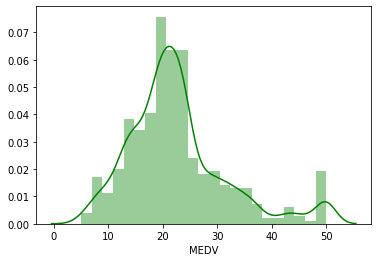

In [12]:
sns.distplot(df['MEDV'], color='g')

We can also look at the number of rooms per dwelling like this.

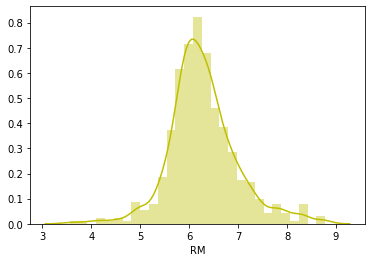

In [13]:
sns.distplot(df['RM'], color='y')

What about the relationships between some of the statistics and the median house value?
Firstly we look at DIS:

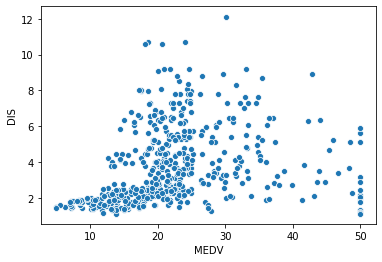

In [14]:
sns.scatterplot(x='MEDV', y='DIS', data=df)

It is difficult to tell if a definite linear relationship exists between these variables, but an unusual vertical line of values on the MEDV=50 line stand out somewhat.

We can look at RAD also:

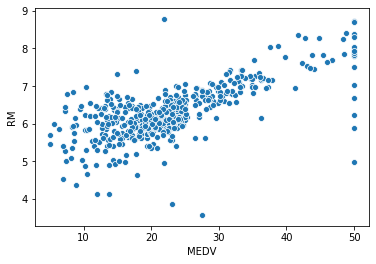

In [15]:
sns.scatterplot(x='MEDV', y='RM', data=df)

The linear relationship is much more apparent here - however the clustering of points on the MEDV=50 mark is even more apparent in this plot. This will require further investigation. 

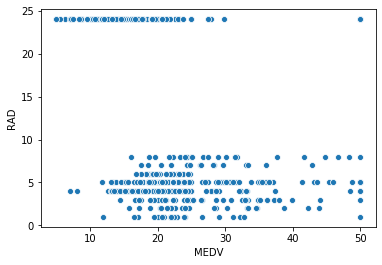

In [16]:
sns.scatterplot(x='MEDV', y='RAD', data=df)

This is quite a bit different to the other plots - the RAD value refers to "index of accessibility to major highways" - it appears that there is a broad range of houses values that have an accessibility rating between 0 and 10, then a very large gap, with a range of houses in the low- to medium price range (with a single high price outlier) with a much higher index of around 24.

## Infer

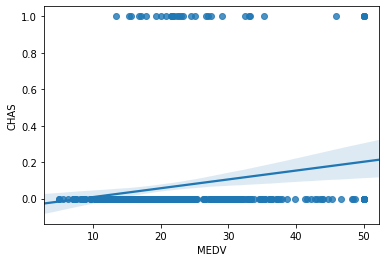

In [17]:
sns.regplot(x="MEDV", y="CHAS", data=df)

*** Add a violin plot?? ***

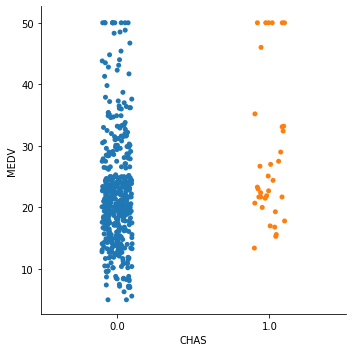

In [18]:
sns.catplot(x='CHAS', y='MEDV',  data=df)

Now lets visualise the distribution of this using histograms with KDEs overlaid on the same plot:

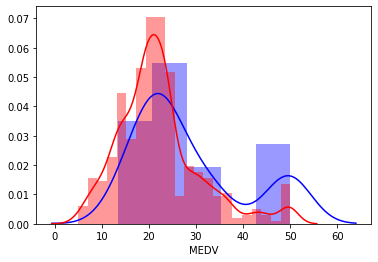

In [19]:
# Extract subsets of the dataframe for houses on the Charles River (ry) vs houses not on it (rn)
ry = df.loc[df['CHAS'] == 1]
rn = df.loc[df['CHAS'] == 0]

# Overlay a distplot for each on the same plot for comparison
sns.distplot(ry['MEDV'], color='b')
sns.distplot(rn['MEDV'], color='r')

Although the histograms of the two data sets look quite different, the shapes of the kernal density estimate plots are not dissimilar - although it can be said with reasonable confidence that the values of houses on the Charles River appear to be generally higher than those not on it. We will have to confirm this now by carrying out statistical tests using scipy.

### T-Test

We can carry out a t-test using scipy.stats to check if there is a significant difference in median house prices between those along the Charles River and those that are not. We need to use an independent t-test.

*** should confirm that the t-test assumptions are met?

The null hypothesis here is that the means are equal. Therefore if there is no significant difference between the means, the t-statistic should be close to 0.

First we need MEDV split into two separate sets - one where CHAS=0 and one where CHAS=1. This has already been carried out to generate the histograms above:
* rn = dataframe containing only data on houses not along the Charles River
* ry = dataframe containing only data on houses along the Charles River

In [20]:
ss.ttest_ind(rn['MEDV'], ry['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Results:
* t-Statistic: -3.996
* p-value: 7.391e<sup>-5</sup>

We can also check this by carrying out the t-test using statsmodel instead:

In [21]:
ws.ttest_ind(rn['MEDV'], ry['MEDV'])

(-3.9964374660905095, 7.390623170519883e-05, 504.0)

The results are identical - with the inclusion of the degrees of freedom (504).

#### p-value
We generally accept a p-value of 0.5 as being the lower bound of whether a relationship is significant or not. Our calculated p-value is sinificantly lower than this, we can therefore conclude that there is a significant difference between the means - in other words we reject the null hypothesis and can state that there is a significant difference in median house prices between those on the Charles River and those not on it.

** find reference for the above?

### Conclusions

We can conclude that the difference in the means is statistically significant. However we should caveat this - earlier we noted that an issue with the MEDV values - the distribution of the values indicate that the value above 50 have been truncated for some reason, this would certainly have an effect on the means.

## Predict

We will now use the keras package to create a neural network to predict the median house price based on the datasets other variables.

In [23]:
import keras as kr
import numpy as np

Using TensorFlow backend.
C:\Users\Peter\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Peter\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Peter\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

** need to choose variables to predict with - ideally those that correlate with the house price, may be of interest to choose several with varying degrees of correlation

### Choosing Correlated Variables

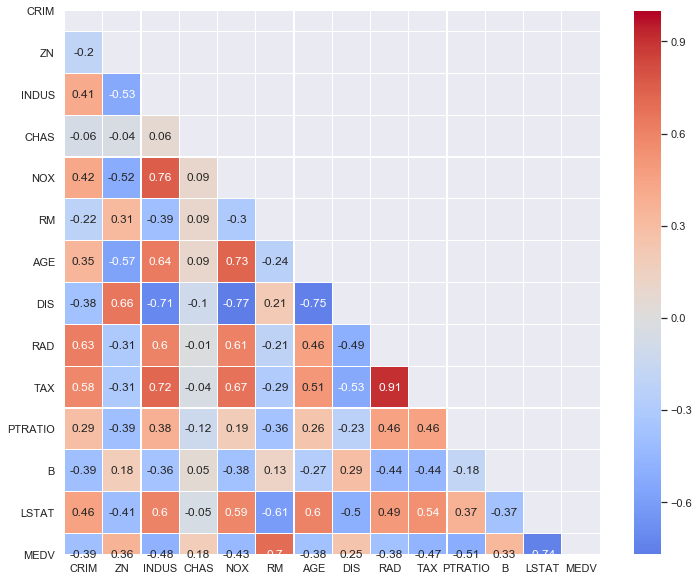

In [58]:
# Seaborn heatmap
sns.set(style="dark")

# Mask upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12,10))
sns.heatmap(df.corr().round(2), annot=True, mask=mask, cmap ="coolwarm", center=0, linewidths=0.2)

Results: Fields positively correlated with MEDV are:
* ZN: 0.36
* CHAS: 0.18
* RM: 0.7
* DIS: 0.25
* B: 0.33

We can take several of these to model.

Results: 10 fields most strongly correlated with MEDV are:
* CRIM: -0.39
* ZN: 0.36
* INDUS: -0.48
* NOX: -0.43
* RM: 0.7
* RAD: -0.38
* TAX: -0.47
* PTRATIO: -0.51
* B: 0.33
* LSTAT: -0.74
    
We can use these as inputs for the model.

** need to decide on layers, numbers of neurons

In [132]:
inputs = df[["CRIM", "ZN", "INDUS", "NOX", "RM", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "CHAS", "AGE", "DIS"]]
inputs.describe()

,CRIM,ZN,INDUS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT,CHAS,AGE,DIS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,9.549407,408.237154,18.455534,356.674032,12.653063,0.069170,68.574901,3.795043
std,8.601545,23.322453,6.860353,0.115878,0.702617,8.707259,168.537116,2.164946,91.294864,7.141062,0.253994,28.148861,2.105710
min,0.006320,0.000000,0.460000,0.385000,3.561000,1.000000,187.000000,12.600000,0.320000,1.730000,0.000000,2.900000,1.129600
25%,0.082045,0.000000,5.190000,0.449000,5.885500,4.000000,279.000000,17.400000,375.377500,6.950000,0.000000,45.025000,2.100175
50%,0.256510,0.000000,9.690000,0.538000,6.208500,5.000000,330.000000,19.050000,391.440000,11.360000,0.000000,77.500000,3.207450
75%,3.677083,12.500000,18.100000,0.624000,6.623500,24.000000,666.000000,20.200000,396.225000,16.955000,0.000000,94.075000,5.188425
max,88.976200,100.000000,27.740000,0.871000,8.780000,24.000000,711.000000,22.000000,396.900000,37.970000,1.000000,100.000000,12.126500


In [145]:
inputs = df[["INDUS", "RM", "TAX", "PTRATIO", "LSTAT", "AGE"]]
inputs.describe()

,INDUS,RM,TAX,PTRATIO,LSTAT,AGE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.136779,6.284634,408.237154,18.455534,12.653063,68.574901
std,6.860353,0.702617,168.537116,2.164946,7.141062,28.148861
min,0.460000,3.561000,187.000000,12.600000,1.730000,2.900000
25%,5.190000,5.885500,279.000000,17.400000,6.950000,45.025000
50%,9.690000,6.208500,330.000000,19.050000,11.360000,77.500000
75%,18.100000,6.623500,666.000000,20.200000,16.955000,94.075000
max,27.740000,8.780000,711.000000,22.000000,37.970000,100.000000


*** need to normalise?

In [146]:
outputs = df["MEDV"]

### Split Dataset

We need to split the dataset into a training dataset and a predictions dataset.

In [192]:
import sklearn.model_selection as mod

In [201]:
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

Normalise the data:

In [149]:
mean = inputs_train.mean()
std = inputs_train.std()

inputs_train = (inputs_train - mean)/std
inputs_test = (inputs_test - mean)/std

In [150]:
print(inputs_train.describe())
print(inputs_test.describe())

              INDUS            RM           TAX       PTRATIO         LSTAT  \
count  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02   
mean   2.498826e-15 -7.326922e-15  2.198461e-17  2.130144e-14 -2.423804e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.569401e+00 -3.712550e+00 -1.286397e+00 -2.656576e+00 -1.529606e+00   
25%   -8.826408e-01 -5.530329e-01 -7.537471e-01 -6.590017e-01 -8.013695e-01   
50%   -1.987843e-01 -9.991988e-02 -4.365515e-01  2.199309e-01 -1.361835e-01   
75%    9.917939e-01  4.599082e-01  1.574350e+00  8.134958e-01  5.973076e-01   
max    2.391449e+00  3.404972e+00  1.843667e+00  1.635355e+00  3.548085e+00   

                AGE  
count  4.040000e+02  
mean  -1.817853e-16  
std    1.000000e+00  
min   -2.334542e+00  
25%   -8.271466e-01  
50%    3.680089e-01  
75%    8.848805e-01  
max    1.091276e+00  
            INDUS          RM         TAX     PTRATIO       LSTAT         AGE
count  102.0

In [141]:
print(outputs_train.describe())
print(outputs_test.describe())

count    404.000000
mean      22.457921
std        9.329800
min        5.000000
25%       16.500000
50%       21.300000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64
count    102.000000
mean      22.829412
std        8.689274
min        5.000000
25%       18.350000
50%       21.050000
75%       24.925000
max       50.000000
Name: MEDV, dtype: float64


In [142]:
inputs_test.iloc[0]

INDUS      0.382145
RM        -0.697374
TAX       -0.738543
PTRATIO   -1.109104
LSTAT      0.420727
AGE       -0.415865
Name: 297, dtype: float64

### Build Neural Network

*** https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f


In [199]:
# Create a new neural network.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 

model.add(Dense(units=300, activation='relu', input_dim=6))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 300)               2100      
_________________________________________________________________
dense_78 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_79 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 101       
Total params: 82,501
Trainable params: 82,501
Non-trainable params: 0
_________________________________________________________________


In [200]:
inputs_test.iloc[0]

INDUS       10.590
RM           5.404
TAX        277.000
PTRATIO     18.600
LSTAT       23.980
AGE         88.600
Name: 211, dtype: float64

In [197]:
prediction = model.predict(inputs_test.as_matrix()[0:1])
prediction

C:\Users\Peter\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1.]], dtype=float32)

### Training

Now we must train the neural network.

In [198]:
model.fit(inputs_train, outputs_train, epochs=100)

Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 578.1646 - accuracy: 0.0000e+00
Epoch 2/100
404/404 [==============================] - 0s 157us/step - loss: 578.1646 - accuracy: 0.0000e+00
Epoch 3/100
404/404 [==============================] - 0s 146us/step - loss: 578.1646 - accuracy: 0.0000e+00
Epoch 4/100
404/404 [==============================] - 0s 158us/step - loss: 578.1646 - accuracy: 0.0000e+00
Epoch 5/100
404/404 [==============================] - 0s 152us/step - loss: 578.1646 - accuracy: 0.0000e+00
Epoch 6/100
404/404 [==============================] - 0s 141us/step - loss: 578.1646 - accuracy: 0.0000e+00
Epoch 7/100
404/404 [==============================] - 0s 151us/step - loss: 578.1646 - accuracy: 0.0000e+00
Epoch 8/100
404/404 [==============================] - 0s 127us/step - loss: 578.1646 - accuracy: 0.0000e+00
Epoch 9/100
404/404 [==============================] - 0s 136us/step - loss: 578.1646 - accuracy: 0.0000e+00
Epoch 10/100
404/404 